In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
import tensorflow as tf
from skimage.transform import resize

In [3]:
pwd

'c:\\Users\\muham\\OneDrive\\Desktop\\data science\\Deep Learning\\PROJECT\\images'

In [4]:
anger_images = glob.glob('*/*Anger.jpg')
disgust_images = glob.glob('*/*Disgust.jpg')
fear_images = glob.glob('*/*Fear.jpg')
happy_images = glob.glob('*/*Happy.jpg')
neutral_images = glob.glob('*/*Neutral.jpg')
sad_images = glob.glob('*/*Sad.jpg')
surprised_images = glob.glob('*/*Surprised.jpg')

In [5]:
print(len(anger_images))
print(len(disgust_images))
print(len(fear_images))
print(len(happy_images))
print(len(neutral_images))
print(len(sad_images))
print(len(surprised_images))

17
17
17
17
17
17
17


In [6]:
anger_images = glob.glob('test/angry/*.png')
disgust_images = glob.glob('test/disgusted/*.png')
fear_images = glob.glob('test/fearful/*.png')
happy_images = glob.glob('test/happy/*.png')
neutral_images = glob.glob('test/neutral/*.png')
sad_images = glob.glob('test/sad/*.png')
surprised_images = glob.glob('test/surprised/*.png')

In [7]:
print(len(anger_images))
print(len(disgust_images))
print(len(fear_images))
print(len(happy_images))
print(len(neutral_images))
print(len(sad_images))
print(len(surprised_images))

958
111
1024
1774
1233
1247
831


In [8]:
# anger = 1, contempt = 2, disgusted = 3, fear = 4, happy = 5, neutral = 6, sad = 7, surprised =8

In [9]:
image = []
label = []
for i in anger_images:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

for i in disgust_images:
    img = plt.imread(i)
    image.append(img)
    label.append(2)

for i in fear_images:
    img = plt.imread(i)
    image.append(img)
    label.append(3)

for i in happy_images:
    img = plt.imread(i)
    image.append(img)
    label.append(4)

for i in neutral_images:
    img = plt.imread(i)
    image.append(img)
    label.append(5)

for i in sad_images:
    img = plt.imread(i)
    image.append(img)
    label.append(6)
    
for i in surprised_images:
    img = plt.imread(i)
    image.append(img)
    label.append(7)

In [10]:
image_ts = []
label_ts = []
for i in anger_images:
    img = plt.imread(i)
    image_ts.append(img)
    label_ts.append(1)

for i in disgust_images:
    img = plt.imread(i)
    image_ts.append(img)
    label_ts.append(2)

for i in fear_images:
    img = plt.imread(i)
    image_ts.append(img)
    label_ts.append(3)

for i in happy_images:
    img = plt.imread(i)
    image_ts.append(img)
    label_ts.append(4)

for i in neutral_images:
    img = plt.imread(i)
    image_ts.append(img)
    label_ts.append(5)

for i in sad_images:
    img = plt.imread(i)
    image_ts.append(img)
    label_ts.append(6)

    
for i in surprised_images:
    img = plt.imread(i)
    image_ts.append(img)
    label_ts.append(7)

In [11]:
import cv2
image = [cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in image_ts]

In [12]:
image_ts = [cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in image_ts]

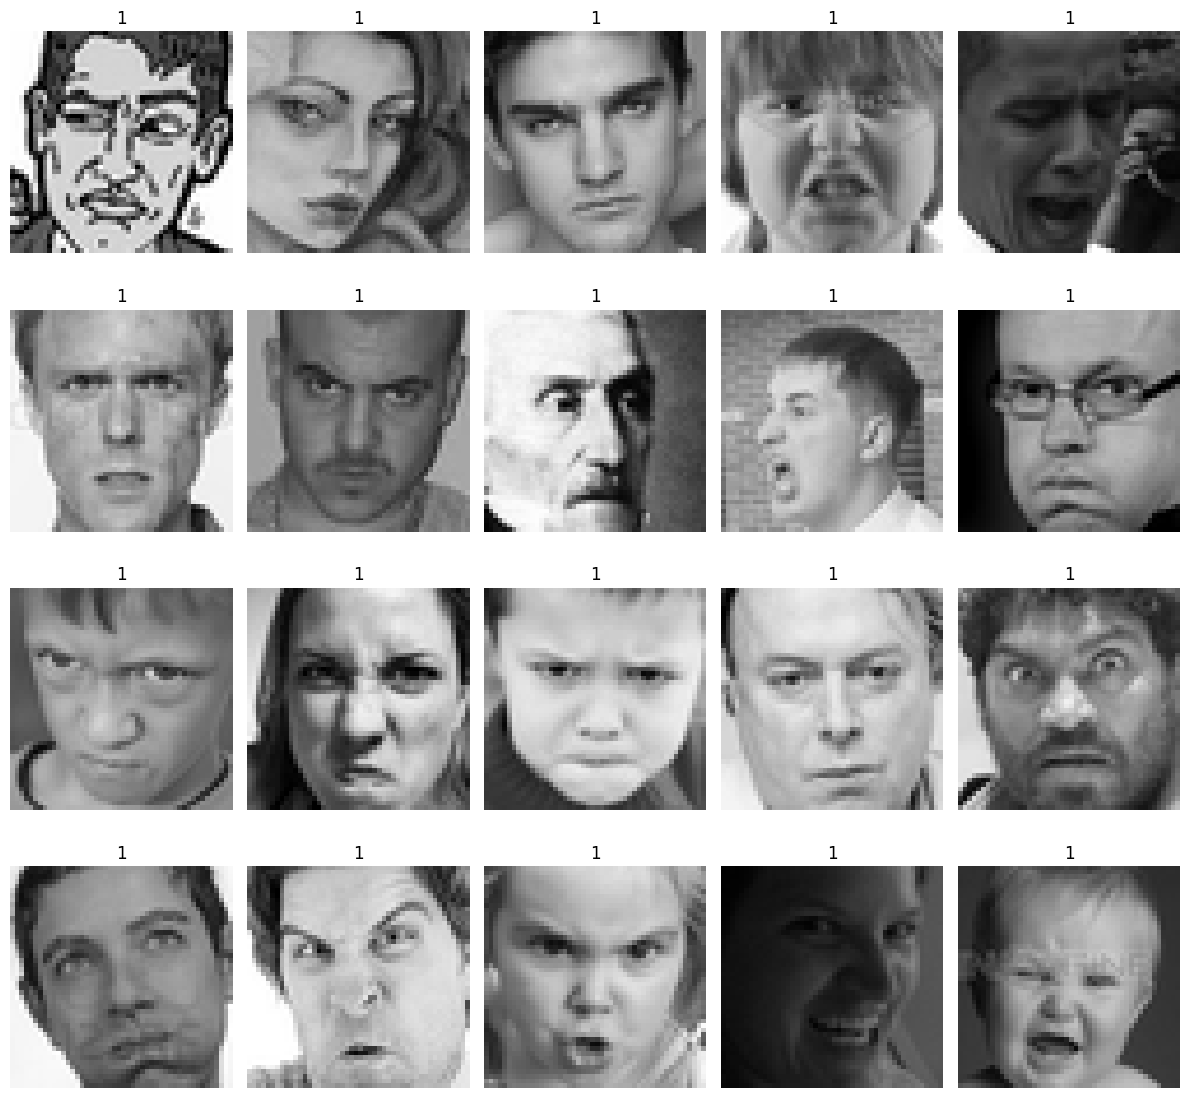

In [13]:
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(image[i])
    plt.title(label[i])
    plt.axis('off')
    plt.tight_layout()
    

In [14]:
for i in range(20):
    print(image[i].shape)

(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)
(48, 48, 3)


In [15]:
xtrain = []
for i in image:
    xtrain.append(resize(i, (128,128,3)))
xtrain = np.array(xtrain)

xtest = []
for i in image_ts:  
    xtest.append(resize(i, (128,128,3)))
xtest = np.array(xtest)


In [16]:
ytest = np.array(label_ts)
ytrain = np.array(label)

In [17]:
ytrain

array([1, 1, 1, ..., 7, 7, 7])

In [18]:
ytest

array([1, 1, 1, ..., 7, 7, 7])

In [19]:
from keras import Sequential,layers

In [20]:
model = Sequential()
model.add(layers.Conv2D(256,(3,3),activation = 'relu',input_shape=(128,128,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='selu'))
model.add(layers.Dense(128,activation='elu'))
model.add(layers.Dense(64,activation='selu'))
model.add(layers.Dense(64,activation='elu'))
model.add(layers.Dense(8,activation='softmax'))

c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
xtrain

array([[[[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.32826287, 0.32826287, 0.32826287],
         [0.5471048 , 0.5471048 , 0.5471048 ],
         [0.4012102 , 0.4012102 , 0.4012102 ]],

        [[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.34977022, 0.34977022, 0.34977022],
         [0.5829504 , 0.5829504 , 0.5829504 ],
         [0.42749694, 0.42749694, 0.42749694]],

        [[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.3175092 , 0.3175092 , 0.3175092 ],
         [0.529182  , 0.529182  , 0.529182  ],
         [0.3880668 , 0.3880668 , 0.3880668 ]],

        ...,

        [[0.3514859 , 0.3514859 , 0.3514859 ],
         [0.34970894, 0.34970894, 0.34970894]

In [23]:
ytrain

array([1, 1, 1, ..., 7, 7, 7])

In [24]:
model.fit(xtrain,ytrain, epochs=10, validation_split=0.1,batch_size=22)

Epoch 1/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 252s 843ms/step - accuracy: 0.2436 - loss: 1.8306 - val_accuracy: 0.0000e+00 - val_loss: 3.5374
Epoch 2/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 230s 783ms/step - accuracy: 0.2836 - loss: 1.6761 - val_accuracy: 0.0181 - val_loss: 3.3373
Epoch 3/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 230s 782ms/step - accuracy: 0.3609 - loss: 1.5943 - val_accuracy: 0.0752 - val_loss: 2.4972
Epoch 4/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 232s 788ms/step - accuracy: 0.3839 - loss: 1.5165 - val_accuracy: 0.0306 - val_loss: 3.6430
Epoch 5/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 236s 801ms/step - accuracy: 0.4569 - loss: 1.3911 - val_accuracy: 0.0460 - val_loss: 3.8490
Epoch 6/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 237s 781ms/step - accuracy: 0.4928 - loss: 1.2828 - val_accuracy: 0.1588 - val_loss: 2.8381
Epoch 7/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 234s 795ms/step - accuracy: 0.5439 - loss: 1.1574 - val_accuracy: 0.2981 - val_loss: 2.8873
Epoch 8/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 233s 792ms/step - accuracy: 0.60

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,033,626 (23.02 MB)

 Trainable params: 2,011,208 (7.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,022,418 (15.34 MB)

In [27]:
model.evaluate(xtest,ytest)

225/225 ━━━━━━━━━━━━━━━━━━━━ 72s 311ms/step - accuracy: 0.7835 - loss: 0.6381


[1.066528081893921, 0.7509055733680725]

In [28]:
pred = model.predict(xtest)

225/225 ━━━━━━━━━━━━━━━━━━━━ 72s 313ms/step


In [29]:
pred = pred.argmax(axis=1)

In [5]:
pred

NameError: name 'pred' is not defined

In [31]:
from sklearn.utils import shuffle

In [32]:
xtest,pred = shuffle(xtest,pred)

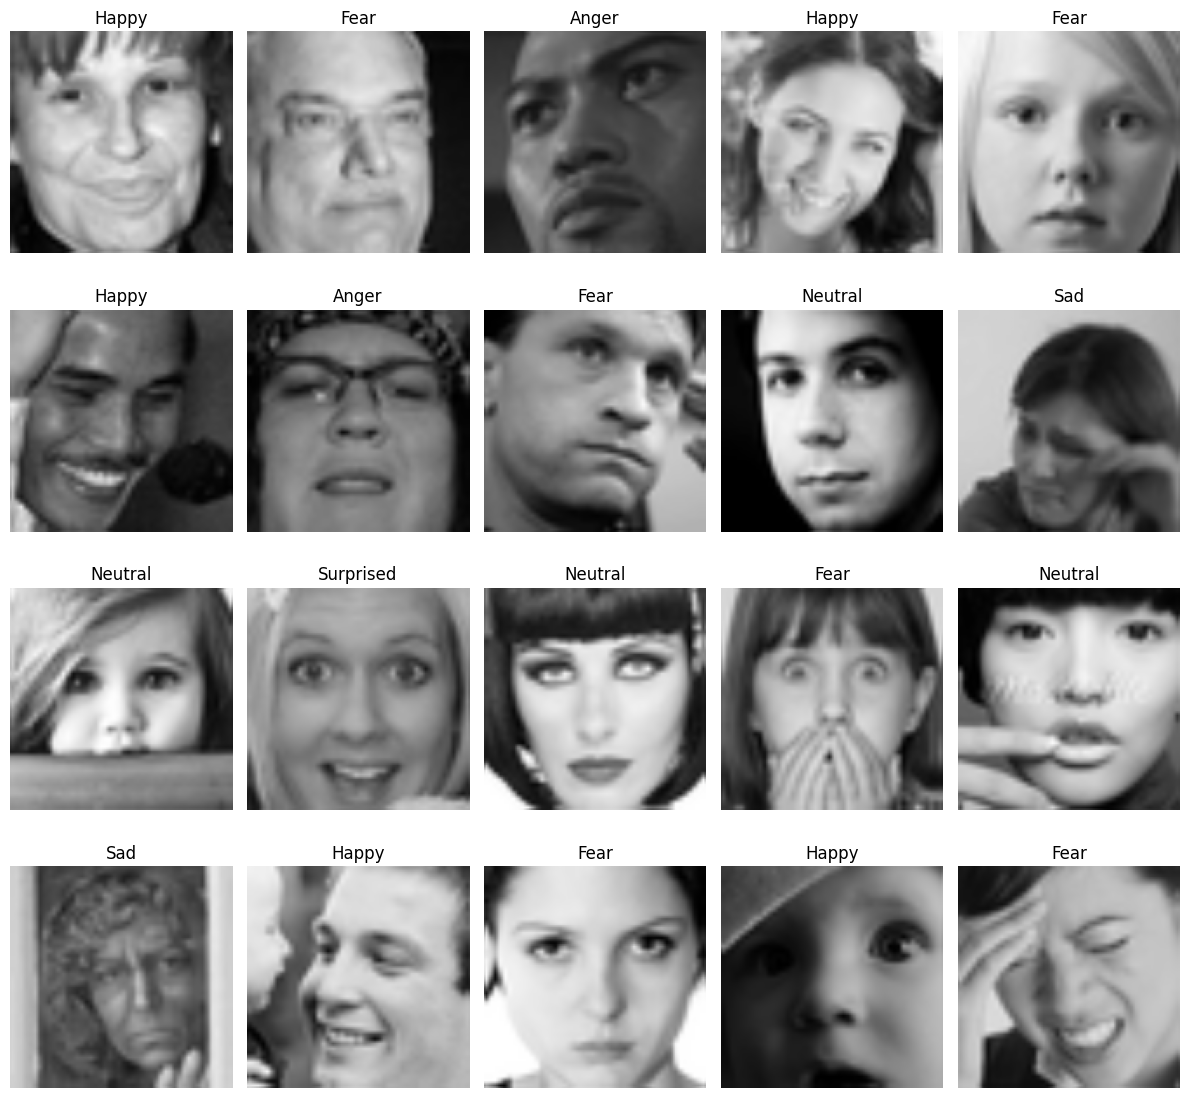

In [187]:
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(xtest[i])
    if pred[i] == 1:
        plt.title('Anger')
    elif pred[i] == 2:
        plt.title('Disgust')
    elif pred[i] == 3:
        plt.title('Fear')
    elif pred[i] == 4:
        plt.title('Happy')
    elif pred[i] == 5:
        plt.title('Neutral')
    elif pred[i] == 6:  
        plt.title('Sad')
    elif pred[i] == 7:
        plt.title('Surprised')
    plt.axis('off')
    plt.tight_layout()

In [33]:
model.save("emotion_model.h5")

In [1]:
import os
os.getcwd()

'c:\\Users\\muham\\OneDrive\\Desktop\\data science\\Deep Learning\\PROJECT\\images'

In [2]:
from tensorflow.keras.models import load_model
model = load_model("emotion_model.h5")

In [3]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load your pre-trained model
model = load_model("emotion_model.h5")  # Replace with your model's file name

# Define the emotions based on your model's output labels
emotions = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprised' ]  # Replace with your emotions

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to preprocess the face for prediction
def preprocess_face(face, target_size=(128,128)):
    face_resized = cv2.resize(face, target_size)
    face_rgb = cv2.cvtColor(face_resized, cv2.COLOR_GRAY2RGB)
    face_array = face_rgb / 255.0  # Normalize the pixel values
    face_array = face_array.reshape(1, target_size[0], target_size[1], 3)  # Add batch and channel dimensions
    return face_array

# Start video capture
cap = cv2.VideoCapture(0)  # 0 for default camera

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.5, minNeighbors=6)
    
    for (x, y, w, h) in faces:
        # Extract the region of interest (the face)
        face = gray_frame[y:y+h, x:x+w]
        
        # Preprocess the face for your model
        try:
            preprocessed_face = preprocess_face(face, (128, 128))  # Adjust to your model's input size
            prediction = model.predict(preprocessed_face)
            print("Prediction output:", prediction)  # Debugging
            emotion_index = np.argmax(prediction)
            emotion_text = emotions[emotion_index]
        except Exception as e:
            print("Error in prediction:", e)
            emotion_text = "Error"

        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
        # Display the emotion text on the frame
        cv2.putText(frame, f"You are {emotion_text}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    # Display the video feed with emotion text
    cv2.imshow("Real-Time Emotion Detector", frame)
    
    # Break the loop on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
Prediction output: [[4.9032354e-07 3.4944888e-02 1.1475422e-04 4.0009730e-03 2.3230541e-02
  9.1149712e-01 2.5670663e-02 5.4054725e-04]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction output: [[7.0620752e-07 2.9089035e-02 4.6558984e-05 2.5005070e-02 2.6529011e-01
  5.5045098e-01 1.2909105e-01 1.0264690e-03]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction output: [[7.0620752e-07 2.9089035e-02 4.6558984e-05 2.5005070e-02 2.6529011e-01
  5.5045098e-01 1.2909105e-01 1.0264690e-03]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction output: [[2.2539193e-06 8.1881508e-02 3.6232991e-04 1.1160689e-01 6.1880320e-01
  7.6149121e-02 1.0997352e-01 1.2211318e-03]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction output: [[5.8825401e-07 1.7429417e-02 3.0169143e-05 8.9991726e-03 8.5633613e-02
  7.9178101e-01 9.5245287e-02 8.8067824e-04]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction output: [[1.0939782e-06 3.6384854e-02 3.8165257e-05 3.3604186e-02 2.8019047